# Sampling Methods #
## Gibbs Sampling ##

For X ∼ N(µ, Σ) where µ = (1, 1) and
Σ =
[1 ,−0.5;
−0.5 ,1 ]

Lets Use numpy and scipy to implement a Gibbs sampling algorithm for this
2D Gaussian. 




Building functions that samples using Gibbs sampling method.

In [2]:
import numpy as np
import scipy.stats as st
import scipy.linalg as la
import matplotlib.pyplot as pp
import pandas as pd
import pymc3 as pm
from pymc3 import Model, sample, Normal, HalfCauchy, Uniform, model_to_graphviz
import arviz as az
import seaborn as sns
import theano.tensor as tt
%matplotlib inline
pp.style.use('seaborn-darkgrid')

In [100]:
mu = np.array([1,1])
cov = np.array([[1,-0.5],[-0.5,1]])

samp = 100
burn = 10

p(x) would be proportional to the following :


exp(-1/2 * [$x_1 - \mu_1 , x_2 - \mu_2$] [ $\Sigma_{11}^{-1}, \Sigma_{12}^{-1} ; \Sigma_{21}^{-1}, \Sigma_{22}^{-1} $] [$x_1 - \mu_1 ; x_2 - \mu_2$])

using allpha as x1 - mu1 and beta as x2 - mu2, this is same as :

$exp(-\frac{1}{2}(\alpha^2\Sigma_{11}^{-1} + \alpha\beta\Sigma_{21}^{-1} + \alpha\beta\Sigma_{12}^{-1} + \beta^2\Sigma_{22}^{-1}))$

In [101]:
la.inv(cov)

array([[1.33333333, 0.66666667],
       [0.66666667, 1.33333333]])

now we can reduce it to  :

$exp(-\frac{1}{2}(\frac{4}{3}\alpha^2 + 2\frac{2}{3}\alpha\beta + \frac{4}{3}\beta^2))$

 = $exp(-\frac{1}{2}\frac{4}{3}(\alpha^2 + \alpha\beta + \beta^2))$

with replacements reversed, we can get the following general expression
for $p(x_1 | x_2 = k)$ or $p(x_2 | x_1 = k)$

$exp(-\frac{1}{2}\frac{4}{3}(x_2^2 + \frac{\alpha - 2}{2})^2)$ 
or
$exp(-\frac{1}{2}\frac{4}{3}(x_1^2 + \frac{\beta - 2}{2})^2)$ 

thus, the $\mu$ and $\sigma^2$ would be :
    

$\mu = \frac{3-k}{2}$
$\sigma^2 = \frac{3}{4}$

In [102]:
def runGib(x1_0, x2_0, sampN, burnN, mu_in, cov_in) :   
    x1 = x1_0
    x2 = x2_0
    x1_array = []
    x2_array = []

    for i in range(burnN) :
        x1 = np.random.normal((mu_in-x1)/2,cov_in)
        x2 = np.random.normal((mu_in-x2)/2,cov_in)
    for i in range(sampN) :
        if (i % 2) == 0 :
            x1 = np.random.normal((mu_in-x1)/2,cov_in)
        else :
            x2 = np.random.normal((mu_in-x2)/2,cov_in)
        x1_array.append(x1)
        x2_array.append(x2)
    return x1_array,x2_array

In [103]:
def plotGib(x_ar, mu_in, cov_in, ind) :
    m = 0
    c = 0
    if ind == 0 :
        m = mu_in[0]
        c = cov_in[0,0]
    else : 
        m = mu_in[1]
        c = cov_in[1,1]
    x_range = np.linspace(m - 3*c, m + 3*c, 100)
    dist_x_r = st.norm.pdf(x_range, m, c)
    pp.plot(x_ar, np.zeros_like(x_ar), 'x')
    pp.plot(x_range, dist_x_r)
    pp.show()

Shown are three runs of the algorithm with 100 samples past
burn-in as 1D scatter plots in each of the two dimensions overlaid on the
plots of the actual marginal distributions.

Plot the x1 and x2 with their true distributions.

First run :

In [104]:
x_1 = runGib(0,0,samp,burn,3,3/4)

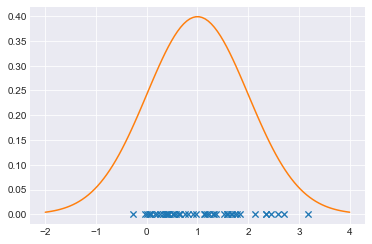

In [105]:
plotGib(x_1[0], mu, cov,0)

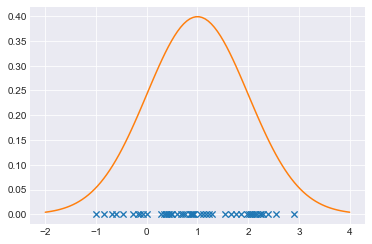

In [106]:
plotGib(x_1[1], mu, cov,1)

Second Run :

In [107]:
x_2 = runGib(10,10,samp,burn,3,3/4)

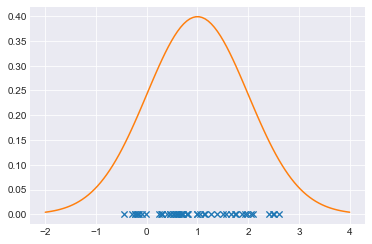

In [108]:
plotGib(x_2[0], mu, cov,0)

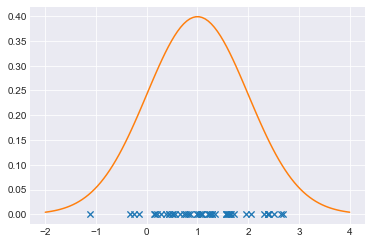

In [109]:
plotGib(x_2[1], mu, cov,1)

Third run :

In [110]:
x_3 = runGib(10,10,samp,burn,3,3/4)

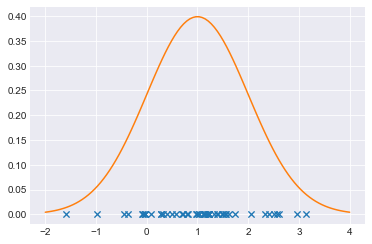

In [111]:
plotGib(x_3[0], mu, cov,0)

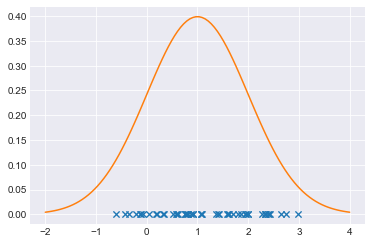

In [112]:
plotGib(x_3[1], mu, cov,1)